### Import all necessary libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error
#import all the models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor


### load the cleaned csv file

In [2]:
df = pd.read_csv('~/Desktop/ml_database.csv')
df.head()

,Facility Id,State,industry_type,year,total_direct_emissions,state_population,state_gdp_per_capita,state_policies_incentives,USDA_energy_invest_unit,USDA_energy_invest_$,%Renewables
0,1004377,TX,Waste Management and Remediation Services,2016,221014.750,27914064,58033.62062,140,176,83600842.01,13.4
1,1003188,TX,Plastics and Rubber Products Manufacturing,2016,31773.480,27914064,58033.62062,140,176,83600842.01,13.4
2,1007733,TX,Utilities,2016,22362.816,27914064,58033.62062,140,176,83600842.01,13.4
3,1002685,TX,Oil and Gas Extraction,2016,265377.770,27914064,58033.62062,140,176,83600842.01,13.4
4,1005601,TX,Nonmetallic Mineral Product Manufacturing,2016,55858.240,27914064,58033.62062,140,176,83600842.01,13.4


### Display the column names in the data frame:

In [3]:
df.columns

Index(['Facility Id', 'State', 'industry_type', 'year',
       'total_direct_emissions', 'state_population', 'state_gdp_per_capita',
       'state_policies_incentives', 'USDA_energy_invest_unit',
       'USDA_energy_invest_$', '%Renewables'],
      dtype='object')

### Delete the unnecessary columns:

In [4]:
df.drop(['Facility Id'], axis = 1, inplace = True)

### Display the data types of the columns:

In [5]:
df.dtypes

State                         object
industry_type                 object
year                           int64
total_direct_emissions       float64
state_population               int64
state_gdp_per_capita         float64
state_policies_incentives      int64
USDA_energy_invest_unit        int64
USDA_energy_invest_$         float64
%Renewables                  float64
dtype: object

### Display the shape of the data frame:

In [6]:
df.shape

(31025, 10)

### Display the general information about the dataset:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31025 entries, 0 to 31024
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   State                      31025 non-null  object 
 1   industry_type              31025 non-null  object 
 2   year                       31025 non-null  int64  
 3   total_direct_emissions     31025 non-null  float64
 4   state_population           31025 non-null  int64  
 5   state_gdp_per_capita       31025 non-null  float64
 6   state_policies_incentives  31025 non-null  int64  
 7   USDA_energy_invest_unit    31025 non-null  int64  
 8   USDA_energy_invest_$       31025 non-null  float64
 9   %Renewables                31025 non-null  float64
dtypes: float64(4), int64(4), object(2)
memory usage: 2.4+ MB


### Count the number of the missing values in the data frame:

In [8]:
df.isnull().sum()

State                        0
industry_type                0
year                         0
total_direct_emissions       0
state_population             0
state_gdp_per_capita         0
state_policies_incentives    0
USDA_energy_invest_unit      0
USDA_energy_invest_$         0
%Renewables                  0
dtype: int64

### Value Counts for Industry type column:

In [9]:
df['industry_type'].value_counts().head(10)

Utilities                                    6590
Waste Management and Remediation Services    5698
Chemical Manufacturing                       3091
Pipeline Transportation                      3086
Oil and Gas Extraction                       2799
Nonmetallic Mineral Product Manufacturing    1598
Food Manufacturing                           1591
Primary Metal Manufacturing                  1242
Paper Manufacturing                          1047
Petroleum and Coal Products Manufacturing     835
Name: industry_type, dtype: int64

### Histograme for '%Renewables' column:

<AxesSubplot:>

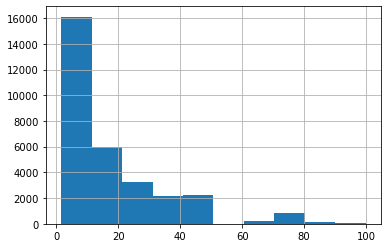

In [10]:
df['%Renewables'].hist()

### Display the number of unique values in 'State' column:

In [11]:
df['State'].unique()

array(['TX', 'KY', 'CA', 'NY', 'IL', 'MN', 'WI', 'AR', 'PA', 'WY', 'FL',
       'IN', 'MI', 'SD', 'MD', 'IA', 'LA', 'OH', 'TN', 'GA', 'VA', 'HI',
       'KS', 'NE', 'WA', 'WV', 'ND', 'OR', 'ID', 'AK', 'OK', 'NM', 'CO',
       'NH', 'NJ', 'MS', 'AZ', 'NV', 'SC', 'MT', 'NC', 'UT', 'VT', 'CT',
       'MA', 'DE', 'ME'], dtype=object)

### Assign numeric codes to categorical columns 'State' and 'industry_type'

In [12]:
df['State'] = df['State'].astype('category')
df['State'] = df['State'].cat.codes

df['industry_type'] = df['industry_type'].astype('category')
df['industry_type'] = df['industry_type'].cat.codes

### Make the histograme for 'total_direct_emissions' column:
We can see that most of the values fall in the beggining of the graph, graph has long tail, and do not follow normal distribution. Models may struggle here.

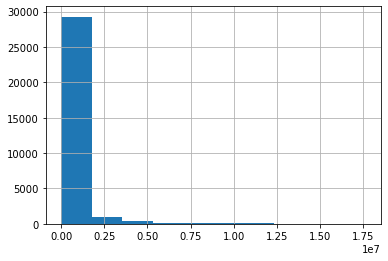

In [13]:
df['total_direct_emissions'].hist()
plt.show()

### Log transformation of the 'total_direct_emissions' column and take values only greater than 6, 

In [14]:
df['total_direct_emissions'] = np.log1p(df['total_direct_emissions'])
df['total_direct_emissions']
df = df.loc[df['total_direct_emissions'] > 6, :]

We can see that data seems to follow normal distribution now,  we can fit the model 

<AxesSubplot:>

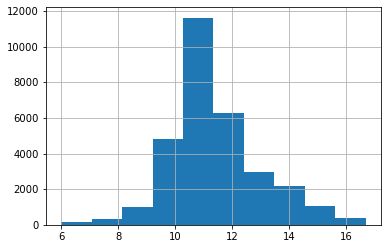

In [15]:
df['total_direct_emissions'].hist()

In [16]:
df = df.rename(columns={"USDA_energy_invest_$": "USDA_energy_invest", "%Renewables": "renewables_percent"})
df = df.drop(columns=["State", "year"])

### How data frame looks like now:

In [17]:
df.to_csv("ml_database_final.csv", index=False)
df.head()

,industry_type,total_direct_emissions,state_population,state_gdp_per_capita,state_policies_incentives,USDA_energy_invest_unit,USDA_energy_invest,renewables_percent
0,48,12.305989,27914064,58033.62062,140,176,83600842.01,13.4
1,33,10.366419,27914064,58033.62062,140,176,83600842.01,13.4
2,46,10.015200,27914064,58033.62062,140,176,83600842.01,13.4
3,29,12.488913,27914064,58033.62062,140,176,83600842.01,13.4
4,28,10.930590,27914064,58033.62062,140,176,83600842.01,13.4


### Correlation between target variable 'total_direct_emissions' and all others

In [18]:
df.drop("total_direct_emissions", axis=1).apply(lambda x: x.corr(df.total_direct_emissions))

industry_type                0.068940
state_population             0.000466
state_gdp_per_capita        -0.045568
state_policies_incentives   -0.020308
USDA_energy_invest_unit     -0.033645
USDA_energy_invest           0.015174
renewables_percent          -0.045204
dtype: float64

###  plot the correlation heatmap 

In [19]:

# corr = df.corr()

# plt.figure(figsize = (14,8))
# sns.heatmap(corr, 
#         xticklabels=corr.columns,
#         linewidth=0.5,
#         yticklabels=corr.columns,
#            cmap="YlGnBu")
# plt.show()

### Divide the data into Features and Response variable:

In [20]:
#features
X = df.loc[:, df.columns != 'total_direct_emissions']  
# Target variable
y = df['total_direct_emissions'] 

### Use 80% of the rows as training set and 20% of the rows as testing set

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

### Scale the training and testing dataset using StandardScaler:

In [22]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

## Fit and Train Linear regression Model:

In [23]:
# Inilialize the Linear Regresor
Lr_regressor = LinearRegression()
# Fit the Linear Regresor Regressor
Lr_regressor.fit(X_train_scaled, y_train)
# predict the values using test data
y_pred = Lr_regressor.predict(X_test_scaled)

### Evaluate the Linear Regression Model using R2 and RMSE score:

In [24]:
R2 = r2_score(y_pred, y_test)
RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
print("R2 score of Linear Regressot is:", R2)
print("RMSE score of Linear Regressot is:", RMSE)


R2 score of Linear Regressot is: -86.57566625557187
RMSE score of Linear Regressot is: 1.5352453200593201


## Fit and train RandomForest Regressor Model:

In [25]:
# Inilialize the Random Forest Regresor
Rf_regressor = RandomForestRegressor()
# Fit the Random Forest Regressor
Rf_regressor.fit(X_train_scaled, y_train)
# predict the values using test data
y_pred = Rf_regressor.predict(X_test_scaled)

### Evaluate the RandomForest Regressor using R2 and RMSE score:

In [26]:
R2 = r2_score(y_pred, y_test)
RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
print("R2 score of RandomForest Regressot is:", R2)
print("RMSE score of  RandomForest Regressot is:", RMSE)


R2 score of RandomForest Regressot is: -1.1346648204958223
RMSE score of  RandomForest Regressot is: 1.3239745930325661


## Fit and train DecisionTree Regressor Model:

In [27]:
# Inilialize the Decision Tree Regressor
Dt_regressor = DecisionTreeRegressor()
# Fit the Decision Tree Regressor
Dt_regressor.fit(X_train_scaled, y_train)
# predict the values using test data
y_pred = Dt_regressor.predict(X_test_scaled)

### Evaluate the Linear DecisionTree Regressor using R2 and RMSE score:

In [28]:
R2 = r2_score(y_pred, y_test)
RMSE = np.sqrt(mean_squared_error(y_pred, y_test))
print("R2 score of DecisionTree Regressor is:", R2)
print("RMSE score of DecisionTree Regressor is:", RMSE)


R2 score of DecisionTree Regressor is: -0.9402593945071012
RMSE score of DecisionTree Regressor is: 1.3644498267257446


In [29]:
# Calculate feature importance in the Random Forest model.
importances = Dt_regressor.feature_importances_
importances

array([0.62808709, 0.10149351, 0.11456292, 0.05989955, 0.01961606,
       0.02126462, 0.05507624])

In [30]:
# We can sort the features by their importance.
sorted(zip(Dt_regressor.feature_importances_, X.columns), reverse=True)

[(0.6280870933102354, 'industry_type'),
 (0.11456292118334484, 'state_gdp_per_capita'),
 (0.1014935127854406, 'state_population'),
 (0.05989954991602299, 'state_policies_incentives'),
 (0.0550762404164268, 'renewables_percent'),
 (0.021264617705128087, 'USDA_energy_invest'),
 (0.019616064683401387, 'USDA_energy_invest_unit')]